In [1]:
%cd ..
%load_ext autoreload
%autoreload 2

/Users/danieloliveiradebrito/Projetos/fakenews


/Users/danieloliveiradebrito/Projetos/fakenews/.venv/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


# Explora Fake Recogna

Standardization of terms: removal of words that may bias the news, such as, “enganoso”, “boato”, “#fake” and, so on. Punctuation, special characters, and URLs were also removed and the standardization to lowercase letters.

In [2]:
import polars as pl

fk_rec = pl.read_excel("data/fakerecogna/FakeRecogna.xlsx")

fk_rec_no_rm = pl.read_excel("data/fakerecogna/FakeRecogna_no_removal_words.xlsx")

In [3]:
(fk_rec
 .filter(pl.col("Classe")==1)
 .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia"))
 .select(["URL", "n_char_noticia"])
).join(
    (fk_rec_no_rm
     .filter(pl.col("Classe")==1)
     .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia_no_rm"))
     .select(["URL", "n_char_noticia_no_rm"])
    ),
    on="URL",
    how="inner"
).with_columns((pl.col("n_char_noticia").cast(pl.Int64) - pl.col("n_char_noticia_no_rm").cast(pl.Int64)).alias("n_char_removed")
               ).select(pl.col("n_char_removed")).describe()

/var/folders/sh/kl0p__nj01dd11mtnll0179r0000gn/T/ipykernel_69641/2265111980.py:3: DeprecationWarning: `lengths` is deprecated. It has been renamed to `len_bytes`.
  .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia"))
/var/folders/sh/kl0p__nj01dd11mtnll0179r0000gn/T/ipykernel_69641/2265111980.py:8: DeprecationWarning: `lengths` is deprecated. It has been renamed to `len_bytes`.
  .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia_no_rm"))


statistic,n_char_removed
str,f64
"""count""",6025.0
"""null_count""",0.0
"""mean""",23.102075
"""std""",95.619055
"""min""",-192.0
"""25%""",-3.0
"""50%""",-1.0
"""75%""",1.0
"""max""",1791.0


In [4]:
(fk_rec
 .filter(pl.col("Classe")==1)
 .with_columns(pl.col("Noticia").str.len_bytes().alias("n_char_noticia"))
 .select(["URL", "n_char_noticia"])
).join(
    (fk_rec_no_rm
     .filter(pl.col("Classe")==1)
     .with_columns(pl.col("Noticia").str.len_bytes().alias("n_char_noticia_no_rm"))
     .select(["URL", "n_char_noticia_no_rm"])
    ),
    on="URL",
    how="inner"
).with_columns(
    (pl.col("n_char_noticia").cast(pl.Int64) - pl.col("n_char_noticia_no_rm").cast(pl.Int64)
     ).alias("n_char_removed")).plot.hist("n_char_removed")#.select(pl.col("n_char_removed")).describe()

:Histogram   [n_char_removed]   (n_char_removed_count)

In [5]:
(fk_rec
 .filter(pl.col("Classe")==1)
 .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia"))
 .select(["URL", "n_char_noticia"])
).join(
    (fk_rec_no_rm
     .filter(pl.col("Classe")==1)
     .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia_no_rm"))
     .select(["URL", "n_char_noticia_no_rm"])
    ),
    on="URL",
    how="inner"
).with_columns((pl.col("n_char_noticia").cast(pl.Int64) - pl.col("n_char_noticia_no_rm").cast(pl.Int64)).alias("n_char_removed")
               ).with_columns(pl.col("n_char_removed")>0).plot.hist("n_char_removed")#.select(pl.col("n_char_removed")).describe()

/var/folders/sh/kl0p__nj01dd11mtnll0179r0000gn/T/ipykernel_69641/2779935124.py:3: DeprecationWarning: `lengths` is deprecated. It has been renamed to `len_bytes`.
  .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia"))
/var/folders/sh/kl0p__nj01dd11mtnll0179r0000gn/T/ipykernel_69641/2779935124.py:8: DeprecationWarning: `lengths` is deprecated. It has been renamed to `len_bytes`.
  .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia_no_rm"))
/Users/danieloliveiradebrito/Projetos/fakenews/.venv/lib/python3.10/site-packages/holoviews/core/data/interface.py:461: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.
  hist, edges = histogram(array, bins=bins, density=density, weights=weights)


:Histogram   [n_char_removed]   (n_char_removed_count)

In [6]:
compara = (fk_rec
 .filter(pl.col("Classe")==1)
 .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia"))
 #.select(["URL", "n_char_noticia"])
).join(
    (fk_rec_no_rm
     .filter(pl.col("Classe")==1)
     .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia_no_rm"))
     #.select(["URL", "n_char_noticia_no_rm"])
    ),
    on="URL",
    how="inner"
).with_columns((pl.col("n_char_noticia").cast(pl.Int64) - pl.col("n_char_noticia_no_rm").cast(pl.Int64)).alias("n_char_removed")
               ).filter(pl.col("n_char_removed")>0).select(["n_char_removed", "Noticia", "Noticia_right"]).filter(pl.col("n_char_removed")==258)[0].select(["Noticia", "Noticia_right"])#.item()

print(compara["Noticia"].item())
print("\n"*5)

print(compara["Noticia_right"].item())

Embora condenado por receber doação suspeita na eleição de 2016, o prefeito de São Caetano do Sul, José Auricchio Junior (PSDB), reelegeu-se no primeiro turno das eleições de 2020 com 45% dos votos. Barrado pela Lei da Ficha Limpa, Auricchio aguarda resposta do TSE (Tribunal Superior Eleitoral) a um recurso que protocolou, enquanto vê o presidente da Câmara, o aliado Anacleto Campanella Junior (Cidadania), tomar posse em seu lugar prometendo governar com seus conselhos. Auricchio Junior foi condenado em duas instâncias por ter recebido uma doação de R$ 290 mil em 2016 de uma pessoa sem renda compatível. Então desempregada, a doadora não havia feito nem sua declaração de Imposto de Renda naquele ano, segundo a Procuradoria. A acusação diz que a mulher foi usada como laranja em um esquema de caixa 2.






condenar receber doação suspeito o eleição o prefeito caetano sul josé auricchio junior psdb reelegeu-se o turno eleição voto barrar pelar lei fichar limpo auricchio aguardar respostar

/var/folders/sh/kl0p__nj01dd11mtnll0179r0000gn/T/ipykernel_69641/2111435907.py:3: DeprecationWarning: `lengths` is deprecated. It has been renamed to `len_bytes`.
  .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia"))
/var/folders/sh/kl0p__nj01dd11mtnll0179r0000gn/T/ipykernel_69641/2111435907.py:8: DeprecationWarning: `lengths` is deprecated. It has been renamed to `len_bytes`.
  .with_columns(pl.col("Noticia").str.lengths().alias("n_char_noticia_no_rm"))


In [7]:
fk_rec_no_rm.filter(pl.col("Noticia").str.contains("#fake"))#.unique()[1]["Noticia"].item()

Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
str,str,str,str,str,str,str,i64
"""É #FAKE mensag…","""Texto que circ…","""circular rede …","""política""",""" 15/11/2020""",""" Por Laís Mode…","""https://g1.glo…",0


In [8]:
fk_rec.filter(pl.col("Noticia").str.contains("boato"))

Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
str,str,str,str,str,str,str,i64
"""É #FAKE que fo…","""Mensagem afirm…","""circular rede …","""entretenimento…",""" 06/05/2020""",""" Por Roberta P…","""https://g1.glo…",0
"""É falso que fi…",null,"""circular rede …","""política""","""06/10/2020 04h…","""Colaboração pa…","""https://notici…",0
"""Cocaína não ma…",null,"""haver o assunt…","""saúde""","""08/02/2020 04h…","""Lucas Borges T…","""https://notici…",1
"""FATO ou FAKE: …","""Equipe fez a c…","""e checagens an…","""entretenimento…",""" 22/12/2018""",""" Por G1 ""","""https://g1.glo…",0
"""FATO ou FAKE: …","""Equipe fez a c…","""e checagens o …","""entretenimento…",""" 17/12/2020""",""" Por G1, O Glo…","""https://g1.glo…",0
…,…,…,…,…,…,…,…
"""autoridade par…","""manifesto publ…","""o objetivo ped…","""saúde""","""9/04/20209""","""gilmar lopes""","""https://www.e-…",0
"""Como verificam…",null,"""o pavimentação…","""política""","""16/12/2019 15h…","""Do UOL, em São…","""https://notici…",0
null,null,"""o presidente j…","""política""","""29/07/2021 20h…","""Bernardo Barbo…","""https://notici…",0


In [9]:
fk_rec_no_rm.filter(pl.col("Noticia").str.contains("boato"))

Titulo,Subtitulo,Noticia,Categoria,Data,Autor,URL,Classe
str,str,str,str,str,str,str,i64
""" Bruno Covas …","""Boato – O pref…","""versão brunir …","""política""","""30/04/2021""",""" Edgard Matsuk…","""https://www.bo…",0
"""Dia da Mentira…","""Mensagens fals…","""dia mentir ale…","""entretenimento…",""" 01/04/2019""",""" Por Hellen Gu…","""https://g1.glo…",0
""" Atacadão est…","""Boato – Em com…","""ofertar limita…","""entretenimento…","""11/10/2019""",""" Edgard Matsuk…","""https://www.bo…",0
"""É #FAKE que ví…","""Vídeo com narr…","""circular rede …","""entretenimento…",""" 05/02/2020""",""" Por G1 ""","""https://g1.glo…",0
"""Não há evidênc…",null,"""postagens afir…","""mundo""","""22/09/2020 19h…","""Decisões do ST…","""https://notici…",0
…,…,…,…,…,…,…,…
"""Fake em Nóis: …",null,"""e boato esclar…","""entretenimento…","""25/08/2021""","""Gilmar Lopes""","""https://www.e-…",0
null,null,"""o presidente j…","""política""","""29/07/2021 20h…","""Bernardo Barbo…","""https://notici…",0
"""É #FAKE que sa…","""Militares da a…","""vir o público …","""brasil""",""" 27/06/2019""",""" Por Hellen Gu…","""https://g1.glo…",0


Seguir com "data/fakerecogna/FakeRecogna.xlsx"

In [10]:
import altair as alt

df_len = (fk_rec.with_columns(pl.col("Noticia").str.len_bytes().alias("len")).rename({"Classe": "label"}))

figure = alt.Chart(df_len.sample(5_000),
          title=alt.Title(
            "Length of the news in the FakeRecogna dataset",
            anchor="start"
          )).encode(
    y=alt.Y("len:Q", title="Text length"),
    x=alt.X("label:N", title="Label"),
    color=alt.Color("label:N", title="Label (is Fake)",
                     scale=alt.Scale(domain=[1, 0],
                                     range=["#D53F3A", "#0F428A"])),
).mark_boxplot().properties(width=300, height=300)

figure.save("reports/figures/fakerecogna-len.png", ppi=300)

In [11]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer("sentence-transformers/paraphrase-multilingual-MiniLM-L12-v2")

/Users/danieloliveiradebrito/Projetos/fakenews/.venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
mini_lm_embedding = fk_rec.with_columns(
    pl.col("Noticia").map_elements(lambda x: model.encode(x).tolist(),
                                  return_dtype=pl.List(pl.Float64)).alias("embeddings")
)

In [13]:
mini_lm_embedding.write_parquet("data/fakerecogna-embedding.zstd", compression="zstd")

# Projeta

In [14]:
import numpy as np
import polars as pl

X_emb_array = np.array(pl.scan_parquet("data/fakerecogna-embedding.zstd").select("embeddings").collect().to_series().to_list())
labels = pl.read_excel("data/fakerecogna/FakeRecogna.xlsx").select("Classe")

In [15]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, perplexity=15, random_state=42)
X = tsne.fit_transform(X_emb_array)

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


# Plota

In [16]:
import altair as alt

figure = (alt.Chart(pl.concat([pl.DataFrame(X), labels], how="horizontal").sample(5_000),
           title=alt.Title(
               "t-SNE projection of the embeddings of the FakeRecogna dataset",
               subtitle="paraphrase-multilingual-MiniLM-L12-v2 embedding",
               anchor="start"
           ))
 .encode(
     x=alt.X("column_0", title="t-SNE 1"),
     y=alt.Y("column_1", title="t-SNE 2"),
     color=alt.Color("Classe:N", title="Label (is Fake)",
                     scale=alt.Scale(domain=[1, 0],
                                     range=["#D53F3A", "#0F428A"])),
     opacity=alt.value(0.6)
 )
 .mark_circle(size=40)
 .properties(width=300, height=300)
 #.configure_view(stroke=None)
 .configure_axis(grid=False)
 )

figure.save("reports/figures/tsne-embedding-fakerecogna.png", ppi=300)

# Algum termo "entrega"?

## Nuvem de palavras

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")
stop_words = set(stopwords.words("portuguese"))

full_text_fake = ""
for noticia in fk_rec.filter(pl.col("Classe")==1).select("Noticia").to_series().to_list():
    full_text_fake += noticia + " "

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danieloliveiradebrito/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


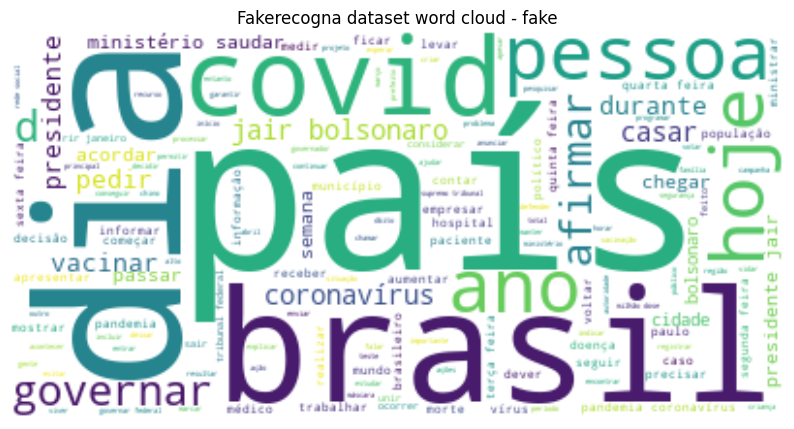

In [14]:
wc = WordCloud(background_color="white",
               stopwords=list(stop_words)).generate(full_text_fake)
plt.figure(figsize=(10, 10))
plt.title("Fakerecogna dataset word cloud - fake")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

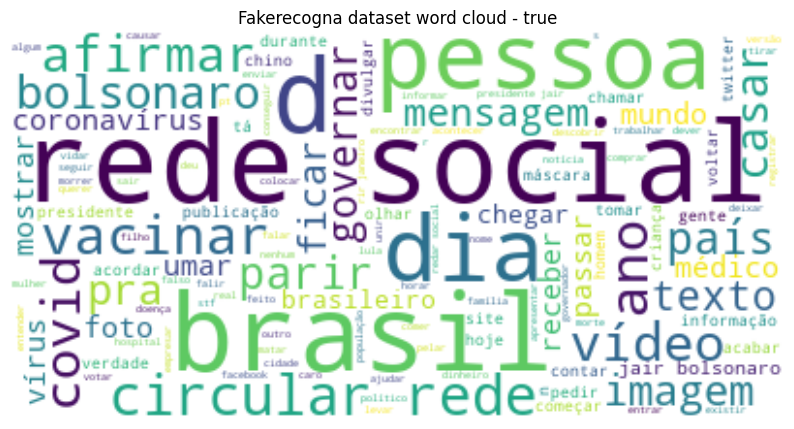

In [16]:
full_text_true = ""
for noticia in fk_rec.filter(pl.col("Classe")==0).select("Noticia").to_series().to_list():
    full_text_true += noticia + " "

wc = WordCloud(background_color="white", stopwords=list(stop_words)).generate(full_text_true)
plt.figure(figsize=(10, 10))
plt.title("Fakerecogna dataset word cloud - true")
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

## Feature importance

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

df = (pl.read_excel("data/fakerecogna/FakeRecogna.xlsx")
 .select(["Noticia", "Classe"])
 .rename({"Noticia": "text", "Classe": "label"})
 .to_pandas()
)

train, test = train_test_split(df,
                              test_size=0.2,
                              random_state=42,
                              shuffle=True,
                              stratify=df["label"]
                            )

tfidf = TfidfVectorizer()
X_train = tfidf.fit_transform(train["text"])
X_test = tfidf.transform(test["text"])

y_train, y_test = train["label"], test["label"]

In [22]:
len(tfidf.get_feature_names_out())

34699

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

accuracy_score(y_test, y_pred)

0.9378412431751365

In [56]:
import altair as alt

importances = rf.feature_importances_
features = tfidf.get_feature_names_out()

ft_imp = pl.DataFrame(
    dict(
        feature = features,
        importance = importances
    )
).sort("importance", descending=True)

ft_imp_plot = alt.Chart(ft_imp.head(20),
          title=alt.Title("Feature Importance - Random Forest",
                          subtitle="Fakerecogna dataset",
                          anchor="start")).mark_bar().encode(
    x=alt.X("importance:Q", title="Importance"),
    y=alt.Y("feature:N", title="Feature").sort("-x")
)

ft_imp_plot.save("reports/figures/feature-importance-fakerecogna.png", ppi=300)

In [53]:
texto = "hoje o cornavírus circula em meio a uma pandemia de desinformação."
rf.predict_proba(tfidf.transform([texto]))

array([[0.26, 0.74]])

In [55]:
#https://www.gov.br/saude/pt-br/assuntos/covid-19
texto_min_saude = "A Covid-19 é uma infecção respiratória aguda causada pelo coronavírus SARS-CoV-2, potencialmente grave, de elevada transmissibilidade e de distribuição global. O SARS-CoV-2 é um betacoronavírus descoberto em amostras de lavado broncoalveolar obtidas de pacientes com pneumonia de causa desconhecida na cidade de Wuhan, província de Hubei, China, em dezembro de 2019. Pertence ao subgênero Sarbecovírus da família Coronaviridae e é o sétimo coronavírus conhecido a infectar seres humanos."
rf.predict_proba(tfidf.transform([texto_min_saude.lower()]))

array([[0.17, 0.83]])